In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences # cümlelerin uzunluklarını fixlemek için kullanılır
from keras.models import Sequential
from keras.layers import Embedding # intgerları yoğunluk vektörlerine çevirmek için kullanılır
from keras.layers import SimpleRNN, Dense, Activation

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
num_words = 20000
max_len = 130
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)


In [3]:
print("X_train Type: ", type(x_train))
print("Y_train Type: ", type(y_train))
print("X_train shape:", x_train.shape)
print("Y_train shape: ", y_train.shape)

X_train Type:  <class 'numpy.ndarray'>
Y_train Type:  <class 'numpy.ndarray'>
X_train shape: (25000,)
Y_train shape:  (25000,)


In [4]:
num_training_samples = 40000
num_testing_samples = 10000

# Combine the training and testing data to split them again
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

# Shuffle the combined data to ensure random distribution
indices = np.arange(len(x_combined))
np.random.shuffle(indices)

# Select the first num_training_samples for training and the next num_testing_samples for testing
x_train = x_combined[indices[:num_training_samples]]
y_train = y_combined[indices[:num_training_samples]]
x_test = x_combined[indices[num_training_samples:num_training_samples + num_testing_samples]]
y_test = y_combined[indices[num_training_samples:num_training_samples + num_testing_samples]]

In [5]:
print("X_train Type: ", type(x_train))
print("Y_train Type: ", type(y_train))
print("X_train shape:", x_train.shape)
print("Y_train shape: ", y_train.shape)

print("X_test Type: ", type(x_test))
print("Y_test Type: ", type(y_test))
print("X_test shape:", x_test.shape)
print("Y_test shape: ", y_test.shape)

X_train Type:  <class 'numpy.ndarray'>
Y_train Type:  <class 'numpy.ndarray'>
X_train shape: (40000,)
Y_train shape:  (40000,)
X_test Type:  <class 'numpy.ndarray'>
Y_test Type:  <class 'numpy.ndarray'>
X_test shape: (10000,)
Y_test shape:  (10000,)


In [6]:
# pad_sequences -> same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [7]:
print(x_train)

[[    7     4  1473 ...    16    41   559]
 [    0     0     0 ...     5  1035  1962]
 [ 1060   455     4 ...     6  1520   136]
 ...
 [10579   196 18134 ...    14 14723  1528]
 [  127    14   306 ...  2631     5 11391]
 [   18  1378     2 ...    58     5   174]]


In [8]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
rnn = Sequential()

# Embedding layer
embedding_dim = 32
rnn.add(Embedding(num_words, embedding_dim, input_length=max_len))

# SimpleRNN layer with 64 nodes and relu activation
rnn.add(SimpleRNN(64, input_shape=(num_words, max_len), activation="relu"))

# Dense output layer
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

# Print the summary of the model
print(rnn.summary())

# Compile the model
rnn.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                6208      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 646,273
Trainable params: 646,273
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
history = rnn.fit(np.array(x_train), np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)), epochs=5, batch_size=128, verbose=1)

Epoch 1/5
313/313 [==============================] - 12s 30ms/step - loss: 0.7321 - accuracy: 0.7336 - val_loss: 0.3648 - val_accuracy: 0.8470
Epoch 2/5
313/313 [==============================] - 9s 27ms/step - loss: 0.3873 - accuracy: 0.8622 - val_loss: 0.3126 - val_accuracy: 0.8720
Epoch 3/5
313/313 [==============================] - 9s 27ms/step - loss: 0.2911 - accuracy: 0.8873 - val_loss: 0.3424 - val_accuracy: 0.8648
Epoch 4/5
313/313 [==============================] - 9s 28ms/step - loss: 0.3291 - accuracy: 0.9007 - val_loss: 0.3019 - val_accuracy: 0.8744
Epoch 5/5
313/313 [==============================] - 8s 27ms/step - loss: 0.2294 - accuracy: 0.9142 - val_loss: 0.3112 - val_accuracy: 0.8774


In [13]:
# Function to classify the sentiment of a sentence
def classify_sentiment(sentence):
    # Preprocess the input sentence and convert it to a sequence
    word_to_index = imdb.get_word_index()
    sentence = sentence.lower().split()
    sequence = []
    for word in sentence:
        index = word_to_index.get(word, 0)  # Use index 0 for unknown words
        if index < num_words:
            sequence.append(index + 3)  # Add 3 to the index to account for reserved indices (0, 1, 2)
    sequence = pad_sequences([sequence], maxlen=max_len)
    
    # Predict the sentiment using the trained model
    prediction = rnn.predict(sequence)[0][0]
    
    # Return the result
    if prediction >= 0.5:
        return "Positive"
    else:
        return "Negative"

In [18]:
input_sentence = "I love this movie"
result = classify_sentiment(input_sentence)
print(f"Sentence: '{input_sentence}' \nSentiment: {result}")

1/1 [==============================] - 0s 35ms/step
Sentence: 'I love this movie' 
Sentiment: Positive


313/313 [==============================] - 3s 10ms/step - loss: 0.3112 - accuracy: 0.8774
Accuracy: % 87.73999810218811
{'loss': [0.7320635318756104, 0.38731977343559265, 0.291098952293396, 0.3291179835796356, 0.22944577038288116], 'accuracy': [0.7336249947547913, 0.8622000217437744, 0.8873249888420105, 0.9007499814033508, 0.9141749739646912], 'val_loss': [0.3647884130477905, 0.3126174509525299, 0.342369943857193, 0.30189868807792664, 0.3112466633319855], 'val_accuracy': [0.847000002861023, 0.871999979019165, 0.864799976348877, 0.8744000196456909, 0.8773999810218811]}


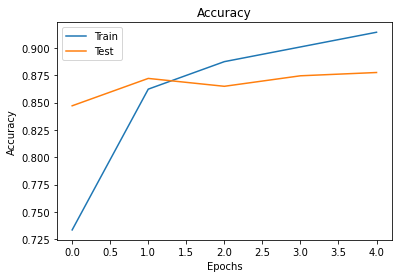

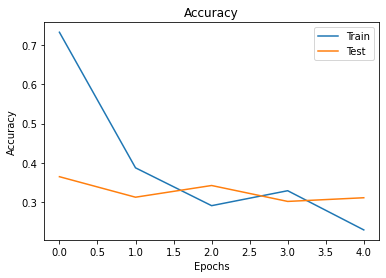

In [16]:
score = rnn.evaluate(x_test, y_test)
print("Accuracy: %", score[1]*100)

print(history.history)

plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()